In [1]:
psrname='J1738+0333'

In [2]:
spna_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_RN11/ptmcmc/'
spnta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [3]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
from diff_chain import  Diff_chain_shift

2023-03-24 22:52:47.060732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 22:52:47.329417: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-24 22:52:47.329452: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-24 22:52:48.233042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [4]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt')
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)
epta_spna_2=epta_spna_1.T

In [5]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
epta_spnta_2=epta_spnta_1.T

In [6]:


spna_arr=[epta_spna_2[lspn-1],epta_spna_2[lspn-2]]

spnta_arr=[epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]

In [10]:
names = ['rn_logA','rn_gamma']
labels=['\log A_R','\gamma_R']
del_names=['delta_logA_rn','delta_gamma_rn']

# Tension considering red noise only

In [11]:


spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=epta_spna_2[-3],names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=epta_spnta_2[-1],names = names,labels=labels,label='SPNTA \n'+psrname)




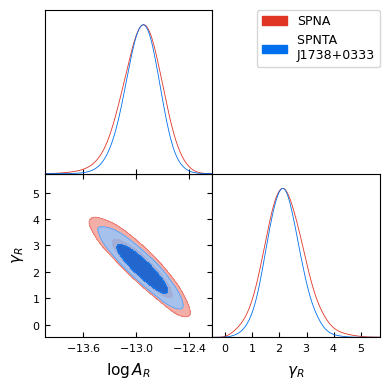

In [12]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_R_DM_EPTA.png',dpi=300)
plt.show()

In [13]:
from diff_chain import  Diff_chain_shift

In [14]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

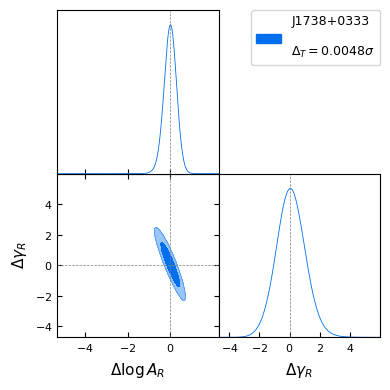

In [15]:


g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNTA.png',dpi=300)

